# Downloading Data

The first thing we need to do is set up Kaggle so the data downloads. This is simple as the process is automated but the only step we need to do to reproduce the entire notebook is get the data using your personal api key from Kaggle. 

To do this we first login to Kaggle. If you don't have an account please make one or else you can't gain access to the automated downloads. 

Instructions from Kaggle:

> "In order to use the Kaggle’s public API, you must first authenticate using an API token. Go to the 'Account' tab of your user profile and select 'Create New Token'. This will trigger the download of kaggle.json, a file containing your API credentials.

> If you are using the Kaggle CLI tool, the tool will look for this token at ~/.kaggle/kaggle.json on Linux, OSX, and other UNIX-based operating systems, and at C:\Users\<Windows-username>\.kaggle\kaggle.json on Windows. If the token is not there, an error will be raised. Hence, once you’ve downloaded the token, you should move it from your Downloads folder to this folder.

> If you are using the Kaggle API directly, where you keep the token doesn’t matter, so long as you are able to provide your credentials at runtime."

The next steps would then be to download the datasets which is automated for you as long as you download your credentials as instructed from Kaggle.

[Dataset 1](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

[Dataset 2](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

[Dataset 3](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

# Kaggle Authentication

The following will search for your Kaggle json file which contains your api key and user information. 
It will move the downloaded credentials from the previous step into a folder that will allow you to make api calls to Kaggle.

In [1]:
import os

directory = os.path.expanduser('~/.kaggle')

if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory created:", directory)
else:
    print("Directory already exists:", directory)

Directory created: C:\Users\delga/.kaggle


Copy kaggle credentials with API token to the correct location

In [2]:
import shutil
import os

source_file = os.path.expanduser('~/Downloads/kaggle.json')
destination_file = os.path.expanduser('~/.kaggle/kaggle.json')

if not os.path.exists(destination_file):
    shutil.copy(source_file, destination_file)
    print("File copied successfully.")
else:
    print("File already exists in the destination. No action taken.")

File copied successfully.


# Download the datasets from Kaggle

Now we can commence downloading the datasets that are used in the repo.

In [3]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()  # Make sure you have a Kaggle API token configured

# Define dataset names and download them
datasets = [
    "sartajbhuvaji/brain-tumor-classification-mri",
    "masoudnickparvar/brain-tumor-mri-dataset",
    "navoneel/brain-mri-images-for-brain-tumor-detection"
]

# Create data directory if it doesn't exist
data_dir = 'temp_data/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

for dataset in datasets:
    # Define destination directory for unzipping
    dest_dir = os.path.join(data_dir, dataset.split('/')[-1])
    
    # Check if dataset is already downloaded
    if not os.path.exists(dest_dir):
        # Download dataset
        api.dataset_download_files(dataset, path=data_dir, unzip=False)
        print(f"Dataset '{dataset.split('/')[-1]}' downloaded successfully.")
        
        # Unzip files into destination directory
        zip_file = os.path.join(data_dir, dataset.split('/')[-1] + '.zip')
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(dest_dir)
        print(f"Dataset '{dataset.split('/')[-1]}' unzipped into '{dest_dir}'.")
        
        # Delete the zip file after extraction
        os.remove(zip_file)
    else:
        print(f"Dataset '{dataset.split('/')[-1]}' already exists. No action taken.")


Dataset 'brain-tumor-classification-mri' downloaded successfully.
Dataset 'brain-tumor-classification-mri' unzipped into 'temp_data/brain-tumor-classification-mri'.
Dataset 'brain-tumor-mri-dataset' downloaded successfully.
Dataset 'brain-tumor-mri-dataset' unzipped into 'temp_data/brain-tumor-mri-dataset'.
Dataset 'brain-mri-images-for-brain-tumor-detection' downloaded successfully.
Dataset 'brain-mri-images-for-brain-tumor-detection' unzipped into 'temp_data/brain-mri-images-for-brain-tumor-detection'.


# Reorganize all the images so we can have more imiage diversity for Training, Testing, Validation

[Dataset 1](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) is a dataset that has four classes. They are 'glioma tumor', 'meningioma tumor', no tumor', and 'pituitary tumor'. There is a good amount of images but the 'no tumor' class does not have many images unfortunatly. The other classes have about 800 images each for training. 

[Dataset 2](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset) is a dataset that that has the same classes as dataset 1. This dataset has an abundance of the 'no tumor' class which dataset 1 lacked. Its a very balanced dataset. 

[Dataset 3](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection) is a very small dataset. There are only two classes which are 'tumor' and 'no tumor'. The only usuable images here would be the no tumor class since the tumor class are not labeled. I do not have the jurisdiction to label them myself. We can make use of the 100 images in this set for the no tumor. 

Overall Process:
* Move the files with there respective categories and merge them. Keep the train and test files respective to eachother, meaning we will not mix these two sets. 
* Move the files to an entirely new folder that will be used for model training.

In [4]:
import os

# Before modifying the folder lets discover the data distribution in its original state.

# Define data folder containing images for dataset 1
data = "temp_data/brain-tumor-classification-mri"

# Define subdirectories for train and test
train_folder = os.path.join(data, "Training/")
test_folder = os.path.join(data, "Testing/")

# Define class subdirectories for train folder
glioma_tumor_train = os.path.join(train_folder, "glioma_tumor/")
meningioma_tumor_train = os.path.join(train_folder, "meningioma_tumor")
no_tumor_train = os.path.join(train_folder, "no_tumor")
pituitary_tumor_train = os.path.join(train_folder, "pituitary_tumor")

# Define class subdirectories for test folder
glioma_tumor_test = os.path.join(test_folder, "glioma_tumor/")
meningioma_tumor_test = os.path.join(test_folder, "meningioma_tumor")
no_tumor_test = os.path.join(test_folder, "no_tumor")
pituitary_tumor_test = os.path.join(test_folder, "pituitary_tumor")

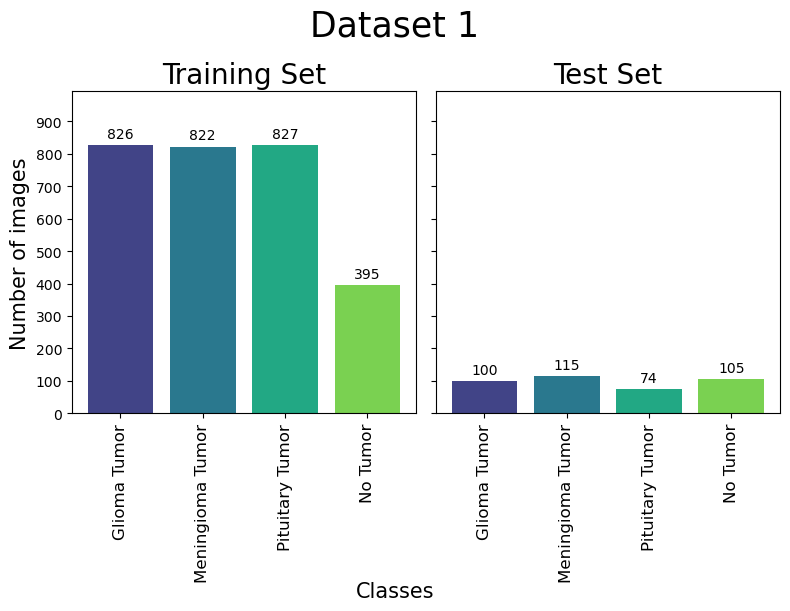

In [5]:
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
%matplotlib inline

# Define counts
train_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_train)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_train)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_train)),
    "No Tumor": len(os.listdir(no_tumor_train))
}

test_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_test)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_test)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_test)),
    "No Tumor": len(os.listdir(no_tumor_test))
}

# Generate a segmented colormap
viridis = plt.cm.viridis
colors = viridis([0.2, 0.4, 0.6, 0.8])  # Divide viridis into four segments

# Plot distributions
fig, ax = plt.subplots(1, 2, figsize=(8,6), facecolor='white', sharex=True, sharey=True)

# Define font sizes
title = 25
plot_title = 20
label = 15
ticks = 12

# Function to add labels on top of bars
def add_labels(ax, counts):
    for bar, count in zip(ax.patches, counts.values()):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=10)

# Plot Train subplot
ax[0].bar(train_counts.keys(), train_counts.values(), color=colors, label="Train")
ax[0].set_title("Training Set", fontsize=plot_title)
ax[0].set_ylabel('Number of images', fontsize=label)
ax[0].tick_params(axis='x', labelsize=ticks, rotation=90)
ax[0].set_ylim(0, max(train_counts.values()) * 1.2)
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set major ticks to integer values
add_labels(ax[0], train_counts)

# Plot Test subplot
ax[1].bar(test_counts.keys(), test_counts.values(), color=colors, label="Test")
ax[1].set_title("Test Set", fontsize=plot_title)
ax[1].tick_params(axis='x', labelsize=ticks, rotation=90)
add_labels(ax[1], test_counts)

# Set common x-label for both subplots
fig.text(0.5, 0, 'Classes', ha='center', fontsize=label)

# Make suptitle
plt.suptitle("Dataset 1", fontsize=title)

plt.tight_layout()
plt.show()

Now that we know how many images we originally had for dataset 1, lets explore dataset 2

In [6]:
import os

# Define data folder containing images for dataset 2
data = "temp_data/brain-tumor-mri-dataset"

# Define subdirectories for train and test
train_folder = os.path.join(data, "Training/")
test_folder = os.path.join(data, "Testing/")

# Define class subdirectories for train folder
glioma_tumor_train = os.path.join(train_folder, "glioma/")
meningioma_tumor_train = os.path.join(train_folder, "meningioma/")
no_tumor_train = os.path.join(train_folder, "notumor/")
pituitary_tumor_train = os.path.join(train_folder, "pituitary/")

# Define class subdirectories for test folder
glioma_tumor_test = os.path.join(test_folder, "glioma/")
meningioma_tumor_test = os.path.join(test_folder, "meningioma/")
no_tumor_test = os.path.join(test_folder, "notumor/")
pituitary_tumor_test = os.path.join(test_folder, "pituitary/")

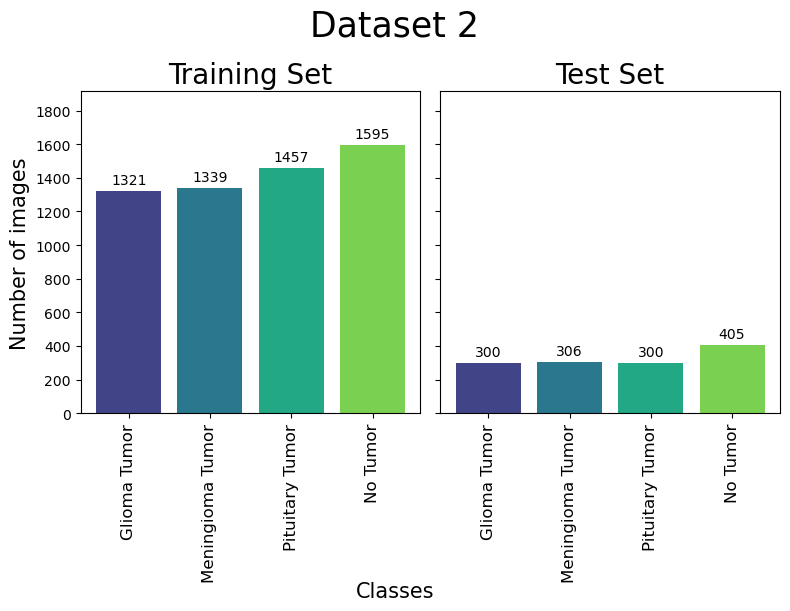

In [7]:
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
%matplotlib inline

# Define counts
train_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_train)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_train)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_train)),
    "No Tumor": len(os.listdir(no_tumor_train))
}

test_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_test)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_test)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_test)),
    "No Tumor": len(os.listdir(no_tumor_test))
}

# Generate a segmented colormap
viridis = plt.cm.viridis
colors = viridis([0.2, 0.4, 0.6, 0.8])  # Divide viridis into four segments

# Plot distributions
fig, ax = plt.subplots(1, 2, figsize=(8,6), facecolor='white', sharex=True, sharey=True)

# Define font sizes
title = 25
plot_title = 20
label = 15
ticks = 12

# Function to add labels on top of bars
def add_labels(ax, counts):
    for bar, count in zip(ax.patches, counts.values()):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=10)

# Plot Train subplot
ax[0].bar(train_counts.keys(), train_counts.values(), color=colors, label="Train")
ax[0].set_title("Training Set", fontsize=plot_title)
ax[0].set_ylabel('Number of images', fontsize=label)
ax[0].tick_params(axis='x', labelsize=ticks, rotation=90)
ax[0].set_ylim(0, max(train_counts.values()) * 1.2)
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set major ticks to integer values
add_labels(ax[0], train_counts)

# Plot Test subplot
ax[1].bar(test_counts.keys(), test_counts.values(), color=colors, label="Test")
ax[1].set_title("Test Set", fontsize=plot_title)
ax[1].tick_params(axis='x', labelsize=ticks, rotation=90)
add_labels(ax[1], test_counts)

# Set common x-label for both subplots
fig.text(0.5, 0, 'Classes', ha='center', fontsize=label)

# Make suptitle
plt.suptitle("Dataset 2", fontsize=title)

plt.tight_layout()
plt.show()

Now lets explore dataset 3

In [8]:
import os

# Define data folder containing images for dataset 2
data = "temp_data/brain-mri-images-for-brain-tumor-detection"

# Define subdirectories for train and test
no_tumor = os.path.join(data, "no/")
tumor = os.path.join(data, "yes/")

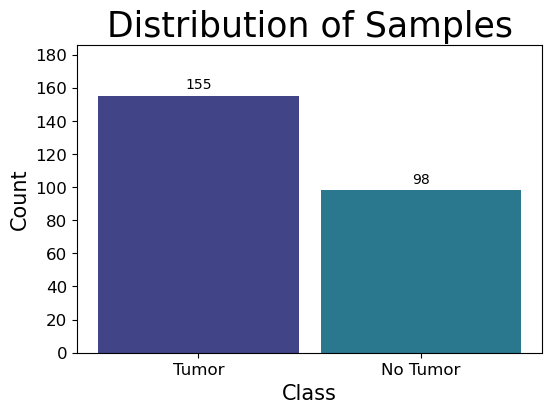

In [9]:
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
%matplotlib inline

# Define counts
counts = {
    "Tumor": len(os.listdir(tumor)),
    "No Tumor": len(os.listdir(no_tumor)),
}

# Generate a segmented colormap
viridis = plt.cm.viridis
colors = viridis([0.2, 0.4, 0.6, 0.8])  # Divide viridis into four segments

# Function to add labels on top of bars
def add_labels(ax, counts):
    for bar, count in zip(ax.patches, counts.values()):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=10)

# Plot distributions
plt.figure(figsize=(6,4), facecolor='white')

# Define font sizes
title = 25
plot_title = 20
label = 15
ticks = 12

# Define bar width
bar_width = 0.9

# Plot bars
plt.bar(counts.keys(), counts.values(), color=colors, width=bar_width)
add_labels(plt.gca(), counts)
plt.ylim(0, max(counts.values()) * 1.2)

# Set title and labels
plt.title('Distribution of Samples', fontsize=title)
plt.xlabel('Class', fontsize=label)
plt.ylabel('Count', fontsize=label)

# Set tick parameters
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


Now that we know how many images we have lets merge everything respectively

In [10]:
import os
import shutil

# Make our data folder
directory = "data/"
if not os.path.exists(directory):
    os.makedirs(directory)
    
    # make subdirectories
    subdirectories1 = ["training", "testing"]
    subdirectories2 = ["glioma", "meningioma", "pituitary", "no_tumor"]
    
    for subdirectory1 in subdirectories1:
        for subdirectory2 in subdirectories2:
            path = os.path.join(directory, subdirectory1, subdirectory2)
            os.makedirs(path)
            
    print("Directory created:", directory)
else:
    print("Directory already exists:", directory)

# Specify dataset1 paths
data1_train_glioma = "temp_data\\brain-tumor-classification-mri\\Training\\glioma_tumor"
data1_train_meningioma = "temp_data\\brain-tumor-classification-mri\\Training\\meningioma_tumor"
data1_train_no_tumor = "temp_data\\brain-tumor-classification-mri\\Training\\no_tumor"
data1_train_pituitary = "temp_data\\brain-tumor-classification-mri\\Training\\pituitary_tumor"

data1_test_glioma = "temp_data\\brain-tumor-classification-mri\\Testing\\glioma_tumor"
data1_test_meningioma = "temp_data\\brain-tumor-classification-mri\\Testing\\meningioma_tumor"
data1_test_no_tumor = "temp_data\\brain-tumor-classification-mri\\Testing\\no_tumor"
data1_test_pituitary = "temp_data\\brain-tumor-classification-mri\\Testing\pituitary_tumor"

# Specify dataset2 paths
data2_train_glioma = "temp_data\\brain-tumor-mri-dataset\\Training\\glioma"
data2_train_meningioma = "temp_data\\brain-tumor-mri-dataset\\Training\\meningioma"
data2_train_no_tumor = "temp_data\\brain-tumor-mri-dataset\\Training\\notumor"
data2_train_pituitary = "temp_data\\brain-tumor-mri-dataset\\Training\\pituitary"

data2_test_glioma ="temp_data\\brain-tumor-mri-dataset\\Testing\\glioma"
data2_test_meningioma = "temp_data\\brain-tumor-mri-dataset\\Testing\\meningioma"
data2_test_no_tumor = "temp_data\\brain-tumor-mri-dataset\\Testing\\notumor"
data2_test_pituitary = "temp_data\\brain-tumor-mri-dataset\\Testing\\pituitary"

# Specify dataset3 paths
data3_no_tumor = "temp_data\\brain-mri-images-for-brain-tumor-detection\\no"

Directory created: data/


In [11]:
# Now lets move all the training images 
# Define destination folder 
data_dest = "data\\"

# Handle dataset 1 first 

# Move glioma images from dataset1 to the data folder
for dataset1_path in [data1_train_glioma, data1_test_glioma]:
    for filename in os.listdir(dataset1_path):
        src = os.path.join(dataset1_path, filename)
        if 'Training' in dataset1_path:
            dest = os.path.join(data_dest, 'training', 'glioma', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'glioma', filename)
        shutil.move(src, dest)

# Move meningioma images from dataset1 to the data folder
for dataset1_path in [data1_train_meningioma, data1_test_meningioma]:
    for filename in os.listdir(dataset1_path):
        src = os.path.join(dataset1_path, filename)
        if 'Training' in dataset1_path:
            dest = os.path.join(data_dest, 'training', 'meningioma', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'meningioma', filename)
        shutil.move(src, dest)

# Move pituitary images from dataset1 to the data folder
for dataset1_path in [data1_train_pituitary, data1_test_pituitary]:
    for filename in os.listdir(dataset1_path):
        src = os.path.join(dataset1_path, filename)
        if 'Training' in dataset1_path:
            dest = os.path.join(data_dest, 'training', 'pituitary', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'pituitary', filename)
        shutil.move(src, dest)

# Move no tumor images from dataset1 to the data folder
for dataset1_path in [data1_train_no_tumor, data1_test_no_tumor]:
    for filename in os.listdir(dataset1_path):
        src = os.path.join(dataset1_path, filename)
        if 'Training' in dataset1_path:
            dest = os.path.join(data_dest, 'training', 'no_tumor', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'no_tumor', filename)
        shutil.move(src, dest)

print("Images from dataset1 moved successfully.")

# Handle datset 2

# Move glioma images from dataset1 to the data folder
for dataset2_path in [data2_train_glioma, data2_test_glioma]:
    for filename in os.listdir(dataset2_path):
        src = os.path.join(dataset2_path, filename)
        if 'Training' in dataset2_path:
            dest = os.path.join(data_dest, 'training', 'glioma', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'glioma', filename)
        shutil.move(src, dest)

# Move meningioma images from dataset2 to the data folder
for dataset2_path in [data2_train_meningioma, data2_test_meningioma]:
    for filename in os.listdir(dataset2_path):
        src = os.path.join(dataset2_path, filename)
        if 'Training' in dataset2_path:
            dest = os.path.join(data_dest, 'training', 'meningioma', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'meningioma', filename)
        shutil.move(src, dest)

# Move pituitary images from dataset2 to the data folder
for dataset2_path in [data2_train_pituitary, data2_test_pituitary]:
    for filename in os.listdir(dataset2_path):
        src = os.path.join(dataset2_path, filename)
        if 'Training' in dataset2_path:
            dest = os.path.join(data_dest, 'training', 'pituitary', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'pituitary', filename)
        shutil.move(src, dest)

# Move no tumor images from dataset2 to the data folder
for dataset2_path in [data2_train_no_tumor, data2_test_no_tumor]:
    for filename in os.listdir(dataset2_path):
        src = os.path.join(dataset2_path, filename)
        if 'Training' in dataset2_path:
            dest = os.path.join(data_dest, 'training', 'no_tumor', filename)
        else:
            dest = os.path.join(data_dest, 'testing', 'no_tumor', filename)
        shutil.move(src, dest)

print("Images from dataset2 moved successfully.")

# Handle dataset 3

for dataset3_path in [data3_no_tumor]:
    for filename in os.listdir(dataset3_path):
        src = os.path.join(dataset3_path, filename)
        dest = os.path.join(data_dest, 'training', 'no_tumor', filename)
        shutil.move(src, dest)

print("Images from dataset3 moved successfully.")

Images from dataset1 moved successfully.
Images from dataset2 moved successfully.
Images from dataset3 moved successfully.


Before we make a validation folder with images lets view how many images we have for train and test now.

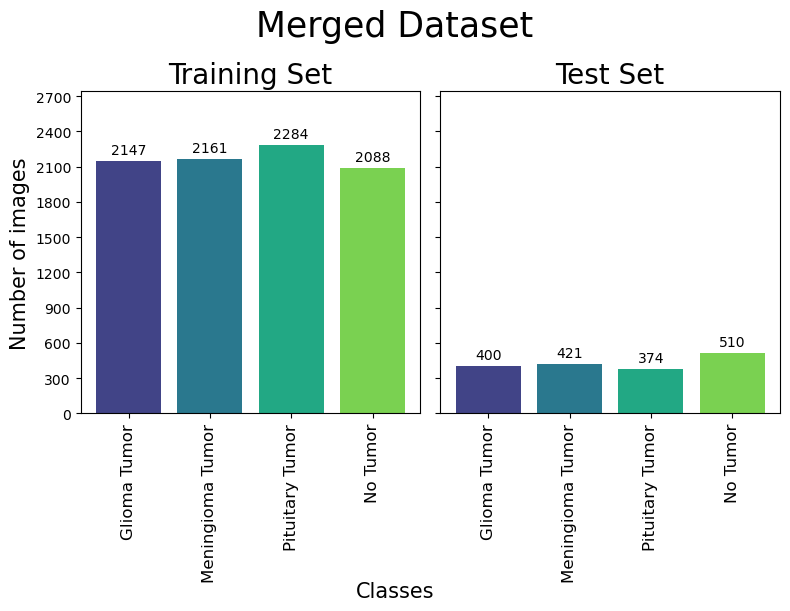

In [12]:
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
%matplotlib inline

# Before modifying the folder lets discover the data distribution in its original state.

# Define data folder containing images for the merged sets
data = "data/"

# Define subdirectories for train and test
train_folder = os.path.join(data, "training/")
test_folder = os.path.join(data, "testing/")

# Define class subdirectories for train folder
glioma_tumor_train = os.path.join(train_folder, "glioma")
meningioma_tumor_train = os.path.join(train_folder, "meningioma")
no_tumor_train = os.path.join(train_folder, "no_tumor")
pituitary_tumor_train = os.path.join(train_folder, "pituitary")

# Define class subdirectories for test folder
glioma_tumor_test = os.path.join(test_folder, "glioma")
meningioma_tumor_test = os.path.join(test_folder, "meningioma")
no_tumor_test = os.path.join(test_folder, "no_tumor")
pituitary_tumor_test = os.path.join(test_folder, "pituitary")

# Define counts
train_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_train)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_train)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_train)),
    "No Tumor": len(os.listdir(no_tumor_train))
}

test_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_test)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_test)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_test)),
    "No Tumor": len(os.listdir(no_tumor_test))
}

# Generate a segmented colormap
viridis = plt.cm.viridis
colors = viridis([0.2, 0.4, 0.6, 0.8])  # Divide viridis into four segments

# Plot distributions
fig, ax = plt.subplots(1, 2, figsize=(8,6), facecolor='white', sharex=True, sharey=True)

# Define font sizes
title = 25
plot_title = 20
label = 15
ticks = 12

# Function to add labels on top of bars
def add_labels(ax, counts):
    for bar, count in zip(ax.patches, counts.values()):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=10)

# Plot Train subplot
ax[0].bar(train_counts.keys(), train_counts.values(), color=colors, label="Train")
ax[0].set_title("Training Set", fontsize=plot_title)
ax[0].set_ylabel('Number of images', fontsize=label)
ax[0].tick_params(axis='x', labelsize=ticks, rotation=90)
ax[0].set_ylim(0, max(train_counts.values()) * 1.2)
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set major ticks to integer values
add_labels(ax[0], train_counts)

# Plot Test subplot
ax[1].bar(test_counts.keys(), test_counts.values(), color=colors, label="Test")
ax[1].set_title("Test Set", fontsize=plot_title)
ax[1].tick_params(axis='x', labelsize=ticks, rotation=90)
add_labels(ax[1], test_counts)

# Set common x-label for both subplots
fig.text(0.5, 0, 'Classes', ha='center', fontsize=label)

# Make suptitle
plt.suptitle("Merged Dataset", fontsize=title)

plt.tight_layout()
plt.show()

# Make a validation folder

In [13]:
# Define validation folder path
from genericpath import isdir
from os import mkdir
import random
import shutil

validation_folder = os.path.join(data, "validation/")

# Check if validation folder already exists. If it doesnt then make the folder.
if os.path.exists(validation_folder):
    print("Validation folder already exists.")
else:
    os.mkdir(validation_folder)
    for subdir in os.listdir(train_folder):
        subdir_path = os.path.join(train_folder, subdir)
        if os.path.isdir(subdir_path):
            os.makedirs(os.path.join(validation_folder, subdir))
    
    # Define percentage of images to move
    portion = 0.2
    
    # Set random seed for reproducibility
    random.seed(42)
    
    # Move images from train set to validation set randomly
    for subdir in os.listdir(train_folder):
        subdir_path = os.path.join(train_folder, subdir)
        if os.path.isdir(subdir_path):
            images = os.listdir(subdir_path)
            num_images_to_move = int(len(images) * portion)
            images_to_move = random.sample(images, num_images_to_move)
            for image_name in images_to_move:
                src = os.path.join(subdir_path, image_name)
                dst = os.path.join(validation_folder, subdir, image_name)
                shutil.move(src, dst)
    
    print("Images moved to validation set successfully!")

Images moved to validation set successfully!


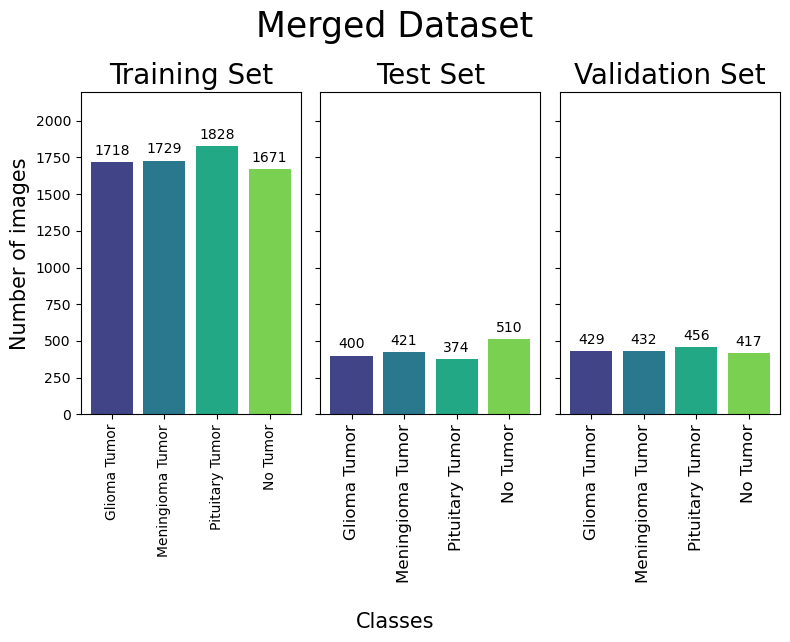

In [14]:
# Now lets observe our new distribution
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
%matplotlib inline

# Define validation folder
validation_folder = os.path.join(data, "Validation/")

# Define class subdirectories for val folder
glioma_tumor_val = os.path.join(validation_folder, "glioma")
meningioma_tumor_val = os.path.join(validation_folder, "meningioma")
no_tumor_val = os.path.join(validation_folder, "no_tumor")
pituitary_tumor_val = os.path.join(validation_folder, "pituitary")

# Define counts
train_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_train)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_train)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_train)),
    "No Tumor": len(os.listdir(no_tumor_train))
}

test_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_test)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_test)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_test)),
    "No Tumor": len(os.listdir(no_tumor_test))
}

val_counts = {
    "Glioma Tumor": len(os.listdir(glioma_tumor_val)),
    "Meningioma Tumor": len(os.listdir(meningioma_tumor_val)),
    "Pituitary Tumor": len(os.listdir(pituitary_tumor_val)),
    "No Tumor": len(os.listdir(no_tumor_val))
}

# Generate a segmented colormap
viridis = plt.cm.viridis
colors = viridis([0.2, 0.4, 0.6, 0.8])  # Divide viridis into four segments

# Plot distributions
fig, ax = plt.subplots(1, 3, figsize=(8,6), facecolor='white', sharex=True, sharey=True)

# Function to add labels on top of bars
def add_labels(ax, counts):
    for bar, count in zip(ax.patches, counts.values()):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Define font sizes
title = 25
plot_title = 20
label = 15
ticks = 12

# Plot Train subplot
ax[0].bar(train_counts.keys(), train_counts.values(), color=colors, label="Train")
ax[0].set_title("Training Set", fontsize=plot_title)
ax[0].set_ylabel('Number of images', fontsize=label)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0, max(train_counts.values()) * 1.2)
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set major ticks to integer values
add_labels(ax[0], train_counts)

# Plot Test subplot
ax[1].bar(test_counts.keys(), test_counts.values(), color=colors, label="Test")
ax[1].set_title("Test Set", fontsize=plot_title)
ax[1].tick_params(axis='x', labelsize=ticks, rotation=90)
add_labels(ax[1], test_counts)

# Plot validation subplot
ax[2].bar(val_counts.keys(), val_counts.values(), color=colors, label="Validation")
ax[2].set_title("Validation Set", fontsize=plot_title)
ax[2].tick_params(axis='x', labelsize=ticks, rotation=90)
add_labels(ax[2], val_counts)

# Set common x-label for both subplots
fig.text(0.5, -0.05, 'Classes', ha='center', fontsize=label)

# Make suptitle
plt.suptitle("Merged Dataset", fontsize=title)

plt.tight_layout()
plt.show()